# Get the data and make it suitable for input

# Build the multi-task learning

In [4]:
import tensorflow as tf
from keras import layers, models
from keras.optimizers import Adam

# Define the shared base model
def build_shared_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    return model

# Define the binary classification head
def build_binary_classification_head(base_model_output):
    x = layers.Dense(64, activation='relu')(base_model_output)
    binary_classification_output = layers.Dense(1, activation='sigmoid', name='binary_classification_output')(x)
    return binary_classification_output

# Define the regression head
def build_regression_head(base_model_output):
    x = layers.Dense(64, activation='relu')(base_model_output)
    regression_output = layers.Dense(1, name='regression_output')(x)
    return regression_output

# Input shape for the image
input_shape = (128, 128, 3)

# Number of classes for binary classification
num_classes_binary = 1

# Shared base model
base_model = build_shared_model(input_shape)

# Binary classification head
binary_classification_output = build_binary_classification_head(base_model.output)

# Regression head
regression_output = build_regression_head(base_model.output)

# Create the multi-task model
model = models.Model(inputs=base_model.input, outputs=[binary_classification_output, regression_output])

# Compile the model
model.compile(optimizer=Adam(),
              loss={'binary_classification_output': 'binary_crossentropy', 'regression_output': 'mse'},
              metrics={'binary_classification_output': 'accuracy', 'regression_output': 'mse'})

# Display the model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_2_input (InputLayer)    [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 126, 126, 64  1792        ['conv2d_2_input[0][0]']         
                                )                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 124, 124, 64  36928       ['conv2d_2[0][0]']               
                                )                                                           

# Train the model

In [5]:
# Assuming you have X_train (input images), y_class (classification labels), and y_reg (regression labels)
import preprocessing

train_gen, val_gen = preprocessing.preprocess()

# Convert classification labels to one-hot encoding
# y_class_one_hot = tf.keras.utils.to_categorical(y_class, num_classes=num_classes)

# Train the model using the fit method
epochs = 10
batch_size = 32

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    batch_size=batch_size,
)

# Save the trained model if needed
model.save('multi_task_model.h5')

Found 8 validated image filenames.
Found 1 validated image filenames.
Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 1.1683 - binary_classification_output_loss: 0.6932 - regression_output_loss: 0.4751 - binary_classification_output_accuracy: 0.5000 - regression_output_mse: 0.4751 - val_loss: 1278.3817 - val_binary_classification_output_loss: 2.2105 - val_regression_output_loss: 1276.1711 - val_binary_classification_output_accuracy: 0.5000 - val_regression_output_mse: 1276.1711
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 1204.8446 - binary_classification_output_loss: 2.1588 - regression_output_loss: 1202.6858 - binary_classification_output_accuracy: 0.5000 - regression_output_mse: 1202.6858 - val_loss: 3.3429 - val_binary_classification_output_loss: 3.0191 - val_regression_output_loss: 0.3239 - val_binary_classification_output_accuracy: 0.5000 - val_regression_output_mse: 0.3239
Epoch 3/10
1/1 [==============================] - 1s 1s/step -

In [3]:
train_gen.next()

(array([[[[0.03137255, 0.        , 0.        ],
          [0.03137255, 0.        , 0.        ],
          [0.03137255, 0.        , 0.        ],
          ...,
          [0.4321899 , 0.38905266, 0.31750214],
          [0.43224734, 0.3891101 , 0.31755322],
          [0.4323048 , 0.38916755, 0.31760427]],
 
         [[0.03137255, 0.        , 0.        ],
          [0.03137255, 0.        , 0.        ],
          [0.03137255, 0.        , 0.        ],
          ...,
          [0.33484775, 0.28559452, 0.21806426],
          [0.3349403 , 0.28569347, 0.21816002],
          [0.33503285, 0.28579238, 0.21825576]],
 
         [[0.03137255, 0.        , 0.        ],
          [0.03137255, 0.        , 0.        ],
          [0.03137255, 0.        , 0.        ],
          ...,
          [0.27769738, 0.22671698, 0.16005032],
          [0.27773568, 0.22675528, 0.16008861],
          [0.27777398, 0.22679357, 0.16012691]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# Check for overfitting

KeyError: 'classification_output_loss'

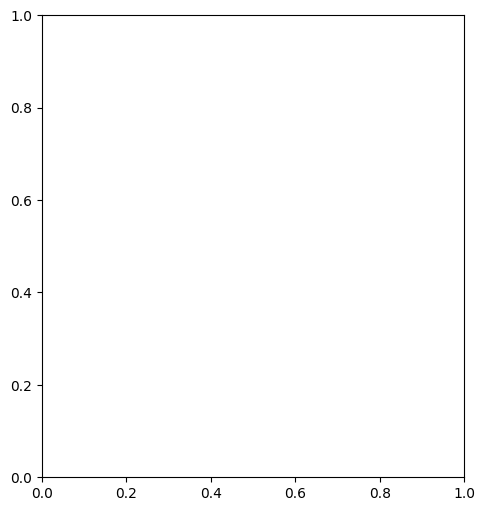

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Plot Classification Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['classification_output_loss'], label='classification_loss')
plt.plot(history.history['val_classification_output_loss'], label='val_classification_loss')
plt.title('Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Regression Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['regression_output_loss'], label='regression_loss')
plt.plot(history.history['val_regression_output_loss'], label='val_regression_loss')
plt.title('Regression Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()